Read the data into a data frame. (3pts)

In [15]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
df.sort_values(by=['PM2.5'])
df.sort_values(['area','PM2.5'])

,siteID,year,month,day,hour,weekday,gps_lat,gps_lon,PM10,Tmp,PM2.5,PM1.0,RH,area
23470,74DA38AF490C,2020,7,19,13,7,22.654000,120.285000,0.000000,29.655000,0.000000,0.000000,56.000000,kaohsiung
127455,74DA38EBF5FC,2020,7,23,23,4,22.335000,120.367000,0.100000,30.708000,0.000000,0.000000,84.400000,taipei
127456,74DA38EBF5FC,2020,7,24,0,5,22.335000,120.367000,0.000000,30.736000,0.000000,0.000000,83.200000,taipei
99884,74DA38EBF5E6,2020,7,18,23,6,24.118000,120.652000,0.000000,30.068750,0.000000,0.000000,46.250000,taichuang
99885,74DA38EBF5E6,2020,7,19,0,7,24.118000,120.652000,0.000000,30.138000,0.000000,0.000000,51.700000,taichuang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64829,74DA38F7C26E,2020,7,23,10,4,24.997000,121.313000,99.555556,32.823333,93.555556,62.888889,67.888889,new_taipei
59673,74DA38EBF6AE,2020,7,23,4,4,23.716000,120.252000,96.333333,30.548889,93.555556,69.000000,64.333333,new_taipei
48667,08BEAC0288D6,2020,7,21,2,2,24.983695,121.250315,95.888889,31.750000,93.555556,83.666667,59.000000,new_taipei
48694,08BEAC0288D6,2020,7,24,1,5,24.983695,121.250315,98.700000,32.402000,95.000000,85.100000,56.000000,new_taipei


Display the average PM2.5 values (over the whole time span) of each device and sort them by the PM2.5 values. You can identity which device location with the best/worst PM2.5 quality and observe some  unreasonable measurements.

In [36]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['siteID','area'])
avg = grouped['PM2.5'].mean()
sort_avg = avg.sort_values()
print(sort_avg)

siteID        area        
74DA38E2B622  taichuang        0.000000
74DA38AF486A  kaohsiung        0.000000
74DA38B050CC  changhua         0.000000
74DA38B05352  yilan            0.000000
74DA38B05436  taipei           0.000000
                                ...    
74DA38F7C26E  new_taipei      38.275570
74DA38EBF8AC  tainan          41.464293
08BEAC028920  new_taipei      42.182840
74DA38AF483E  hsinchu_city    48.537561
08BEAC0288D6  new_taipei      66.692419
Name: PM2.5, Length: 915, dtype: float64


In [ ]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['siteID','area'])
avg = grouped['PM2.5'].mean()
print(avg)

–	Display the average PM2.5 values (over the whole time span) of each city and sort them by the PM2.5 values. You can identity which city has the best/worst air quality

In [38]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['area'])
avg = grouped['PM2.5'].mean()
sort = avg.sort_values()
print(sort)

area
taitung            2.770677
yilan              5.453694
chiayi_city        6.490991
kaohsiung          7.082535
yunlin             7.133232
tainan             7.352566
chiayi_county      7.557860
changhua           8.160436
nantou             8.363522
hsinchu_city       8.484143
taichuang          8.514756
hsinchu_county     9.111924
taoyuan            9.504175
taipei            10.051272
pingtung          10.404558
miaoli            12.079954
keelung           12.633222
new_taipei        13.591451
Name: PM2.5, dtype: float64


Calculate the average PM2.5 of each day within each city. List the results by sorting average PM2.5 values in an ascending order within each city, i.e. you should put average PM2.5 values of the same city together. (We do not mind the order among cities). You can identity which day has the best/worst air quality in each city.

In [55]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['area','day'])
avg = grouped['PM2.5'].mean()
sort = avg.sort_values()
print(sort)

area        day
taitung     21      1.385185
            23      1.391888
            22      1.956292
            24      2.417130
            20      2.543455
                     ...    
new_taipei  19     15.724026
miaoli      23     16.921788
new_taipei  23     17.466700
pingtung    23     17.526157
keelung     23     18.019676
Name: PM2.5, Length: 126, dtype: float64


Calculate average PM 2.5 values (all devices in Taiwan) of each hour on Friday and do the same thing for Saturday. List the results by a table. The table has three columns whose names should be “hour”, “Friday_PM2.5” and “Saturday_PM2.5”. The result should be sorted by “hour” in an ascending order You can observe the difference of air quality change over time between Friday and Saturday

In [77]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
fri_sort = df[df['weekday']==5].groupby('hour')
sat_sort = df[df['weekday']==6].groupby('hour')
fri_avg = fri_sort['PM2.5'].mean()
sat_avg = sat_sort['PM2.5'].mean()
new_df = pd.DataFrame({
    'Friday_PM2.5' : fri_avg,
    'Saturday_PM2.5' : sat_avg
})
print(new_df)

      Friday_PM2.5  Saturday_PM2.5
hour                              
0         8.379282        7.859925
1         8.379035        6.512187
2         8.102212        5.709651
3         8.131230        5.874490
4         8.259331        5.608954
5         8.725270        5.801975
6         9.560076        5.970190
7         9.953535        5.653011
8         9.133940        4.870171
9         8.991955        4.837723
10       10.243132        5.215046
11       10.898488        6.003420
12       11.130155        6.303721
13        9.053625        6.405692
14        7.619646        6.363282
15        6.901259        6.573889
16        5.995774        6.385970
17        6.323988        7.191829
18        6.621482        8.304383
19        7.754749        8.945591
20        8.307870        9.569890
21        8.190150       10.010788
22        8.535912       10.185119
23        8.562165       10.124124


Correlation coefficient between PM2.5 and PM1.0: 0.97


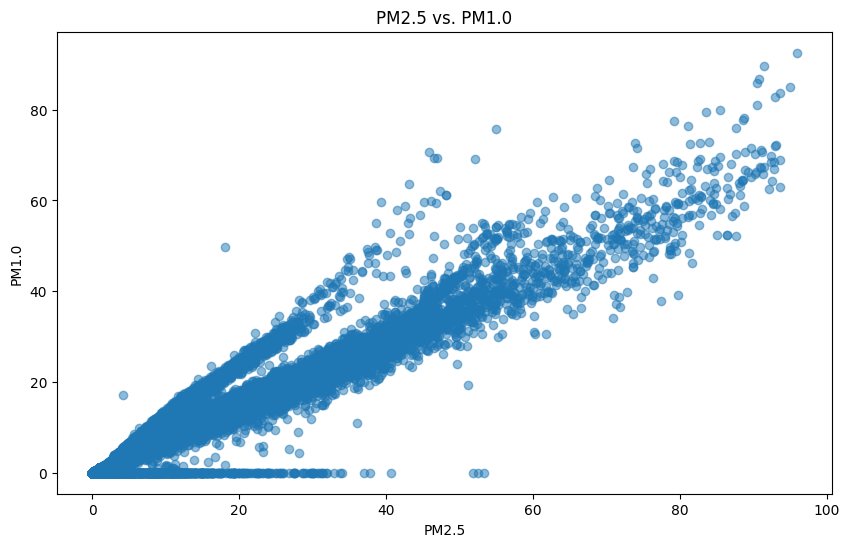

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('airBoxData.csv')

# Select the columns for PM2.5 and PM1.0
pm25 = df['PM2.5']
pm10 = df['PM1.0']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pm25, pm10, alpha=0.5)
plt.title('PM2.5 vs. PM1.0')
plt.xlabel('PM2.5')
plt.ylabel('PM1.0')

# Calculate the correlation coefficient
correlation = np.corrcoef(pm25, pm10)[0, 1]
print(f'Correlation coefficient between PM2.5 and PM1.0: {correlation:.2f}')

# Show the plot
plt.show()


Among Taipei, Pingtung, Nantou and Taichuang, which city has the most significant difference PM2.5 change pattern over the whole day on July 24 from the other three cities? You should choose and create a visualization to support your answer. 

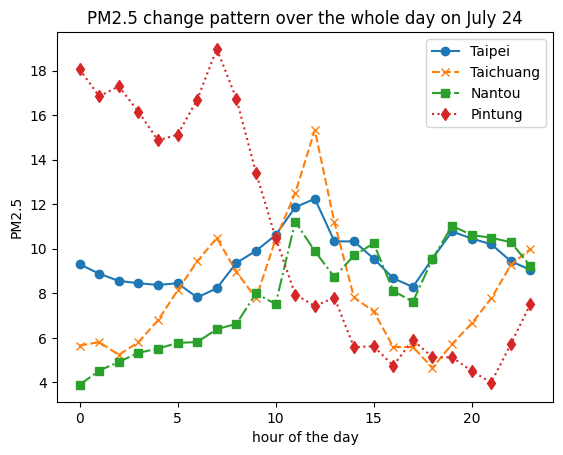

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('airBoxData.csv')

tpe = df[(df['month']==7)&(df['day']==24)&(df['area']=="taipei")].groupby('hour')["PM2.5"].mean()
txg = df[(df['month']==7)&(df['day']==24)&(df['area']=="taichuang")].groupby('hour')["PM2.5"].mean()
ntc = df[(df['month']==7)&(df['day']==24)&(df['area']=="nantou")].groupby('hour')["PM2.5"].mean()
pif = df[(df['month']==7)&(df['day']==24)&(df['area']=="pingtung")].groupby('hour')["PM2.5"].mean()

plt.plot(tpe.index,tpe.values, marker='o', linestyle='-' , label = 'Taipei')
plt.plot(txg.index,txg.values, marker='x', linestyle='--' , label = 'Taichuang')
plt.plot(ntc.index,ntc.values, marker='s', linestyle='-.' , label = 'Nantou')
plt.plot(pif.index,pif.values, marker='d', linestyle=':', label = 'Pintung')

plt.title('PM2.5 change pattern over the whole day on July 24')
plt.xlabel('hour of the day')
plt.ylabel('PM2.5')

plt.legend()
plt.show()


Remove all records whose PM2.5 is 0 (simple data cleaning process to remove impossible data values)

In [143]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
new_df = df.drop(df[df['PM2.5']==0].index)
print(new_df)

              siteID  year  month  day  hour  weekday  gps_lat  gps_lon  \
0       08BEAC0286D2  2020      7   18     1        6   23.876  120.529   
1       08BEAC0286D2  2020      7   18     2        6   23.876  120.529   
2       08BEAC0286D2  2020      7   18     3        6   23.876  120.529   
3       08BEAC0286D2  2020      7   18     4        6   23.876  120.529   
4       08BEAC0286D2  2020      7   18     5        6   23.876  120.529   
...              ...   ...    ...  ...   ...      ...      ...      ...   
150811  74DA38F7C19A  2020      7   24    21        5   24.053  120.629   
150812  74DA38F7C19A  2020      7   24    22        5   24.053  120.629   
150813  74DA38F7C19A  2020      7   24    23        5   24.053  120.629   
150814  74DA38F7C19A  2020      7   18     0        6   24.053  120.629   
150815  74DA38F7C19A  2020      7   18     1        6   24.053  120.629   

             PM10        Tmp      PM2.5      PM1.0         RH      area  
0        4.800000  30.544

Collect all records from Taipei and draw a histogram to shows how many hour PM2.5 records in each histogram bin interval. Set the histogram bin count to 100, the min value to 0 and max value to 100 to create the histogram.

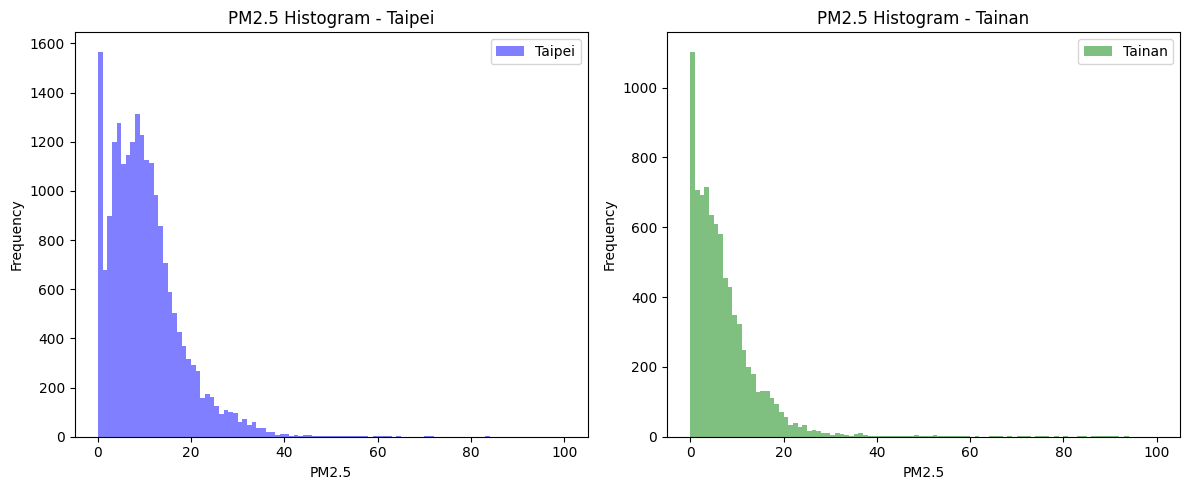

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV data
df = pd.read_csv('airBoxData.csv')

# Filter data for Taipei and Tainan
taipei_data = df[df['area'] == 'taipei']
tainan_data = df[df['area'] == 'tainan']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot Taipei's histogram on the first subplot (ax1)
ax1.hist(taipei_data['PM2.5'], bins=100, range=(0, 100), alpha=0.5, color='blue', label='Taipei')
ax1.set_xlabel('PM2.5')
ax1.set_ylabel('Frequency')
ax1.set_title('PM2.5 Histogram - Taipei')
ax1.legend()

# Plot Tainan's histogram on the second subplot (ax2)
ax2.hist(tainan_data['PM2.5'], bins=100, range=(0, 100), alpha=0.5, color='green', label='Tainan')
ax2.set_xlabel('PM2.5')
ax2.set_ylabel('Frequency')
ax2.set_title('PM2.5 Histogram - Tainan')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()
